In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font',family='AppleGothic')
elif platform.system() == 'Windows':
    font_name =font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('Unkown Sytem....Sorry')

In [8]:
crime_anal_norm = pd.read_csv("crime_anal_norm.csv", encoding = 'utf-8')

<function matplotlib.pyplot.show(*args, **kw)>

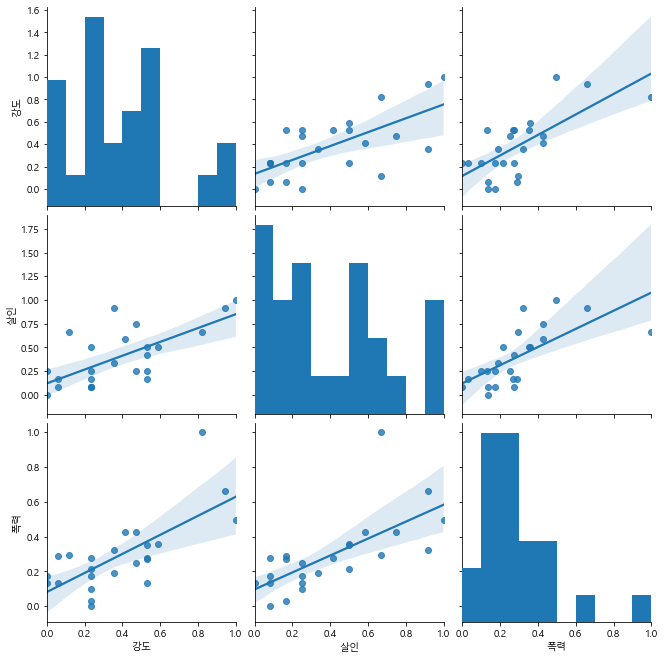

In [9]:
sns.pairplot(crime_anal_norm, vars=["강도","살인",'폭력'], kind='reg', size=3)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

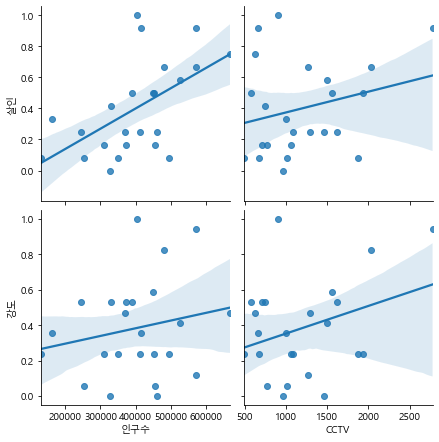

In [10]:
sns.pairplot(crime_anal_norm, x_vars=["인구수","CCTV"], y_vars=["살인","강도"], kind='reg', size=3)
plt.show

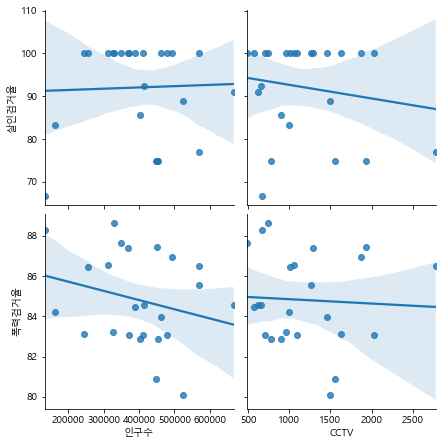

In [11]:
sns.pairplot(crime_anal_norm, x_vars=["인구수","CCTV"], y_vars=["살인검거율","폭력검거율"], kind='reg', size=3)
plt.show()

In [12]:
tmp_max = crime_anal_norm['검거'].max()
crime_anal_norm['검거'] = crime_anal_norm['검거'] / tmp_max * 100
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)


,구별,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
8,도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,348646.0,485,0.318627,100.000000
6,금천구,0.141210,0.058824,0.083333,0.172426,0.134074,80.794702,100.0,100.0,56.668794,86.465433,255082.0,1015,0.589867,97.997139
4,광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.0,100.0,42.200925,83.047619,372164.0,707,2.034438,96.375820
9,동대문구,0.204611,0.470588,0.250000,0.314061,0.250887,84.393064,100.0,100.0,41.090358,87.401884,369496.0,1294,1.490147,95.444250
19,용산구,0.265130,0.529412,0.250000,0.169004,0.133128,89.175258,100.0,100.0,37.700706,83.121951,244203.0,1624,1.346674,94.776790


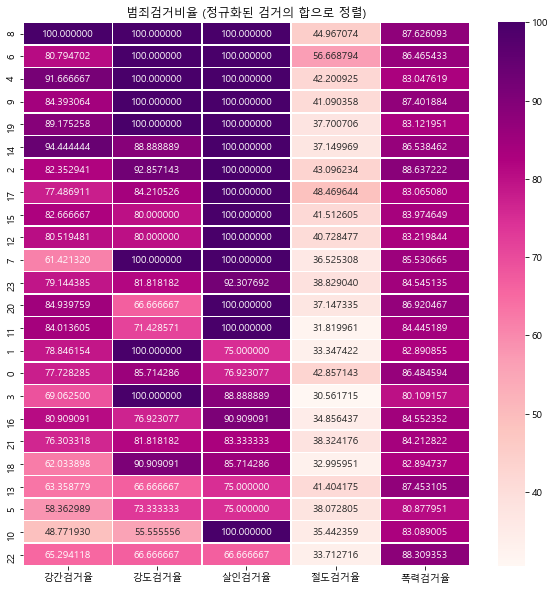

In [13]:
target_col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
plt.figure(figsize = (10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', linewidth=.5, cmap = 'RdPu')
plt.title('범죄검거비율 (정규화된 검거의 합으로 정렬)')
plt.show()

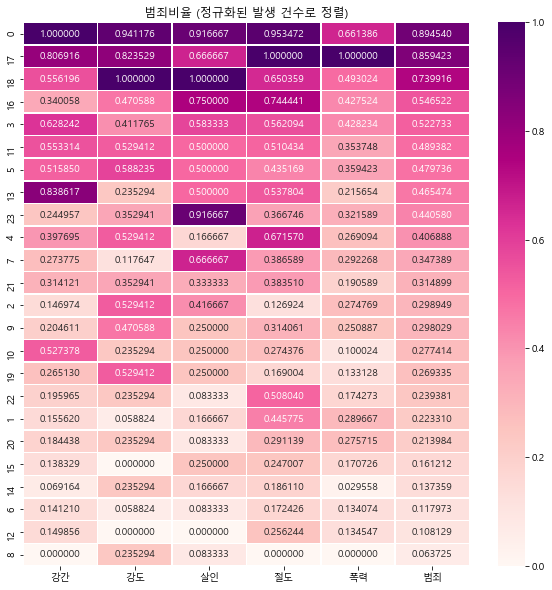

In [14]:
target_col = ['강간','강도','살인','절도','폭력','범죄']

crime_anal_norm['범죄'] = crime_anal_norm['범죄'] / 5
crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄', ascending=False)

plt.figure(figsize = (10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', linewidth=.5, cmap = 'RdPu')
plt.title('범죄비율 (정규화된 발생 건수로 정렬)')
plt.show()